# 1. Ecuación de ondas y sistema en sus primeros modos

#(a) ¿A qué velocidad se propagan las ondas en esta cuerda? Determine los números de onda permitidos y grafique la configuración de los 10 primeros modos.


Al ser una cuerda aproximada como un sistema continuo, tenemos la ecuación de dispersión
$$Ec. 1$$ $$\omega^{(p)}=\sqrt\frac{T_0}{\mu}k^{(p)}$$
Donde $T_0$ es dato del problema y $\mu$ es la densidad lineal del sistema representada como la masa sobre la longitud de la soga ($\frac{M}{L})$. Una vez aclarado esto, podemos notar que $\sqrt\frac{T_0}{\mu}$ tiene unidades de metro/segundo, o velocidad, y efectivamente esta sera la velocidad con las que se propagaran las ondas. En el sistema que tomamos para hacer funcionar el piano tomamos extremos fijos lo que nos permite despejar $k^{(p)}=\frac{p\pi}{L}$, por ser raiz del seno, y tomamos $\alpha=0$ sin pérdida de generalidad para la ecuación:
$$Ec. 2$$ $$\psi(x,t)=\sum_{p=1}^{\infty}A^{(p)}sen(k^{(p)}x+\alpha^{(p)})cos(\omega^{(p)}t+\theta^{(p)})$$
Siendo $p$ cada modo permitido del sistema, notamos que como estamos en la aproximación continua puede haber infinitos modos ya que podemos aproximar la cuerda con infinitas masas y por lo tanto infinitos grados de libertad. Finalmente, podemos ver que en la **Ecuación 2** $k^{(p)}$ y $\alpha^{(p)}$ ya están despejados porque si conocemos $k$, entonces $\omega^{(p)}$ queda definida debido a la **Ecuación 1** (ecuación de dispersión) y sólo faltaría determinar $A^{(p)}$ y $\theta^{(p)}$ que son constantes dadas por las condiciones iniciales.

In [ ]:
#para un tiempo fijo, los modos a representar son
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc # librería de animaciones
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML
import ipywidgets as iwy

import os
import imageio

In [ ]:
l = 3
#def F(x,c,l):
#  return np.sin(c*np.pi*x/l)

def F(modo = 2):
  l = 3
  x=np.linspace(0,3,100)
  y = np.sin(modo*np.pi*x/l)
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color = 'red', label='Cuerda')
  plt.title ('Modo %i' %(modo))
  plt.xlabel('L', fontsize = 12)
  plt.ylabel('x', fontsize = 12)
  plt.grid()

In [ ]:
iwy.interact(F,modo=(1,10,1))

interactive(children=(IntSlider(value=2, description='modo', max=10, min=1), Output()), _dom_classes=('widget-…

<function __main__.F>

Podemos visualizar los primeros 10 modos del sistema. Vemos que el primer modo, tiene medio periodo entre 0 y $L$ ademas de que es simetrico respecto a $\frac{L}{2}$.
El modo 2 es un modo par, asá que no sera simétrico respecto a $\frac{L}{2}$ y ademas notamos que tiene una oscilación completa entre 0 y $L$.


El modo 3 sigue con el patron ,tiene una oscilacion más completa o repetida respecto a sus modos anteriores y siendo un modo impar tambien es simetrico respecto a $\frac{L}{2}$. En el modo 4 se ve que tiene el doble de oscilacion que el modo 2. Esto se debe a que cada modo es múltiplo del otro y cuanto mas grande sea el modo menor sera el periodo, podemos esperar de los modos mas grandes que esten mas "compactados" oscilando cada vez mas entre 0 y $L$.
 Para cerrar notamos que ,independientemente del modo en el que estemos, la funcion empieza y termina en 0 corroborando una vez mas que estamos en el caso de extremos fijos.

# 2. Amplitudes y series de fourier

# (b) Determine en forma analıtica las amplitudes de la serie de Fourier que le permite describir la condicion inicial en velocidad. Para los 10 primeros terminos de la serie, realice un grafico que le permita estudiar el aporte de cada modo/s a la construccion de la condicion inicial. Interprete.


Sabiendo que la cuerda sale inicialmente del reposo al momento de impartirle una velocidad podemos despejar de la **Ecuación 2** en $t=0$
$$\psi(x,0)=\sum_{p=1}^{\infty}A^{(p)}sen(k^{(p)}x)cos(\theta^{(p)})=0$$
y sin perder generalidad definimos $\theta^{(p)}=\frac{\pi}{2}$ para que sea una raiz del coseno.
Luego para la velocidad inicial hacemos algo similar con
$$Ec. 3$$ $$\dot \psi(x,0)=\sum_{p=1}^{\infty}-\omega^{(p)}A^{(p)}sen(k^{(p)}x)sen(\frac{\pi}{2})=\sum_{p=1}^{\infty}-\omega^{(p)}A^{(p)}sen(k^{(p)}x)$$
donde se define $Fp=-\omega^{(p)}A^{(p)}$ y sé por series de fourier y la delta de kronecker que tiene que cumplirse
$$Ec. 4$$ $$Fp=\frac{2}{L}\int_{0}^{L}F(x)sen(k^{(p)}x)dx$$
donde F(x) es la condicion inicial
$$F(x) = \left\{ \begin{array}{cl}
0 &   \ 0\le x\lt P_0-\Delta/2 \\
V_0 & P_0-\frac{\Delta}{2}\le x\le P_0+\frac{\Delta}{2}\\
0 &    P_0+\Delta/2\lt x\le L
\end{array} \right.$$
y con estos límites de integracion llegamos a que
$$Ec. 5$$ $$Fp=\frac{2}{L}\int_{P_0-\frac{\Delta}{2}}^{P_0+\frac{\Delta}{2}}V_0 \cdot sen(k^{(p)}x)dx$$
 $$Fp=\frac{4V_0}{p\pi}sen(\frac{p\pi P_0}{L})sen(\frac{p\pi\Delta}{2L})$$
 Finalmente recurrimos a la definicion que le dimos a Fp y la ecuacion de dispersion para despejar las amplitudes del sistema
$$Ec. 6$$ $$A^{(p)}=-\sqrt\frac{\mu}{T_0}\frac{V_0L}{(p\pi)^2}sen(\frac{p\pi P_0}{L})sen(\frac{p\pi\Delta}{2L})$$

 Y para poder estudiar el aporte de cada modo/s, obtenemos la expresión truncada de la serie de Fourier $\dot\psi(x,t)$:
$$Ec.7$$
$$\tilde{\dot \psi}(x,0)=\sum_{p=1}^{N}\frac{4V_0}{p\pi}sen(\frac{p\pi P_0}{L})sen(\frac{p\pi\Delta}{2L})\cdot sen(\frac{p\pi}{L}x)$$
Por enunciado tomamos $N$=10

In [ ]:
def vo(pMax=10, P0 = l/3, V0 = 0.5, delta = 0.2):

  x=np.linspace(0,l,1000)
  psi = 0
  for p in np.arange(1, pMax+1, 1):
    Fp = ((4*V0/(p*np.pi)) * np.sin((p*np.pi*P0)/l) * np.sin((p*np.pi*delta)/(2*l)))
    psi = psi+ Fp*np.sin((p*np.pi*x)/l)

  plt.figure(figsize=(10,7))
  F(0)
  plt.plot(np.arange(P0-(delta/2),P0+(delta/2),10), V0)
  #fourier
  plt.plot(x,psi, c='b', label = r"$\dot\psi$")
  plt.title ('Aporte del modo %i' %(pMax))
  plt.legend()
  plt.grid()

In [ ]:
iwy.interact(vo,pMax=(1,10,1),P0=(l/6,5*l/6,0.1),V0=(0.1,1,0.1),delta=(0.2,l/6,0.1));

interactive(children=(IntSlider(value=10, description='pMax', max=10, min=1), FloatSlider(value=1.0, descripti…

Se puede notar que entre más vaya aumentando el número de modos $N$, la serie truncada de Fourier va adquiriendo un máximo global en el valor de $P_0$, logrando que se vaya pareciendo cada vez más a la forma de la velocidad incial $\dot\psi(x,0)$ dada por las condiciones inciales. Jugando con los sliders tambien se puede ver la influencia de los distintos parametros en nuestra serie:

Como mencionamos, $P_0$ define donde estara el maximo global de la funcion, lo cual es esperable dado que es la posicion en la que se imprimio la velocidad inicial; delta controla el ancho de la funcion y cuanto mayor sea mas grande sera el pico que esta tenga; para finalizar, la velocidad inicial $V_0$ afectara de manera directa la escala de la funcion, simplemente porque la serie truncada debe llegar a un valor mas alto o mas bajo dependiendo de $V_0$.

Para terminar, notamos que si $P_0=\frac{L}{2}$, independientemente del resto de los valores, la funcion sera simetrica respecto a $\frac{L}{2}$ y por lo tanto solo aportaran a la serie los modos impares(chequear que esto se cumple con la esquematizacion de los modos en el item anterior).

#(c) Estudie la convergencia de la serie: grafique la función aproximada obtenida para distintos valores de truncamiento de la serie de Fourier y compare con la condición inicial original para estudiar la convergencia del método. Explique lo que observa para cada valor elegido y elija, justificando adecuadamente, un valor adecuado para truncar la serie.


Para estudiar como converge la serie, tenemos que ver cuando $N\longrightarrow \infty$. Como es imposible computacionalmente pedir que $N = \infty$, volveremos a usar el código del item (b), pero aumentando el valor de $a\in \mathbb{N}$ en $N = 10^{a}$ con los deslizadores

In [ ]:
def voConverge(a=1, P0 = l/3, V0 = 0.5, delta = 0.2):
  pMax = 10**a
  x=np.linspace(0,l,1000)
  psi = 0
  for p in np.arange(1, pMax+1, 1):
    Fp = ((4*V0/(p*np.pi)) * np.sin((p*np.pi*P0)/l) * np.sin((p*np.pi*delta)/(2*l)))
    psi = psi + Fp*np.sin((p*np.pi*x)/l)

  plt.figure(figsize=(10,7))
  F(0)
  plt.plot(np.arange(P0-(delta/2),P0+(delta/2),10), V0)
  #fourier
  plt.plot(x,psi, c='b', label = r"$\dot\psi$")
  plt.title ('Aporte del modo %i' %(pMax))

  x_1=np.linspace( 0 , P0 - delta/2 ,100 )
  x_2=np.linspace( P0 - delta/2, P0 + delta/2 ,100)
  x_3=np.linspace( P0 + delta/2 , l , 100 )
  Ff=0*x_1
  Fu=V0+0*x_2
  plt.plot( x_1 , Ff ,color='g')
  plt.plot( x_2 , Fu, color='g' , label="velocidad incial")
  plt.plot( x_3 , Ff , color='g' )

  plt.legend()
  plt.grid()

In [ ]:
iwy.interact(voConverge,a=(0,5,1),P0=(l/3,2*l/3,0.2),V0=(0.1,1,0.1),delta=(0.2,l/3,0.1));

interactive(children=(IntSlider(value=1, description='a', max=5), FloatSlider(value=1.0, description='P0', max…

Ahora, al comparar con la velocidad incial, en verde en la gráfica; al estar en el caso $a$ = 1, obtemos el resultado del item (b), y se nota que efectivamente el máximo global que adquiere la serie truncada de Fourier se está acercando al valor $V_0$ pero el ancho de la campana principal es mucho mayor de la ***Zona de Percusión*** = $[P_0 - \frac{\Delta}{2}, P_0 + \frac{\Delta}{2}]$.

Al siguiente valor de $a$ = 2, se nota que el ancho de la campana principal se redujo significativamente y se está aproximando a ser igual al de la zona de percusión, y a su vez, el valor máximo global sobrepasó a $V_0$. Lo mismo sucede para los casos $a$ = 3 y 4

Finalmente, escogemos $a$ = 5 como el valor adecuado para truncar la serie ya que, a simple vista, es imperceptible la diferencia entre la condición de velocidad inicial dada y la serie truncada de Fourier. Concluimos que efectivamente ésta serie truncada de Fourier converge a la función de velocidad inicial dada.

#(d) ¿Cuál es el período del movimiento? A partir de la expresión que describe el movimento transversal $\psi (x,t)$ y la velocidad del movimiento $\dot\psi (x,t)$ ∀t ≥ 0, analice la evolución del movimiento en el tiempo. Grafique (o anime) el sistema a distintos tiempos que considere interesantes

Recordando que el periodo es $\tau = \frac{2 \pi}{\omega}$ entonces, el periodo del movimiento para cada modo es $\tau =  \sqrt\frac{\mu}{T_0}\frac{2 \pi L}{p\pi}$ donde tomamos el periodo mas grande que es el del modo 1. Y nos queda una expresion en función de los datos del enunciado y las condiciones inicales para el movimiento del cuerpo de la forma:
$$Ec. 8$$
$$\psi(x,t)=\sum_{p=1}^{\infty}-\sqrt\frac{\mu}{T_0}\frac{4V_0L}{(p\pi)^2}sen(\frac{p\pi P_0}{L})sen(\frac{p\pi\Delta}{2L})sen(\frac{p\pi}{L}x)cos(\sqrt\frac{T_0}{\mu}\frac{p\pi}{L}t+\frac{\pi}{2})$$


### **NOTA PARA EL LECTOR:**
###Para poder ver la animación, después de que se corra la siguiente celda de código, dar click en icono de carpeta en el margen izquierdo en colab, y doble click en archivo llamado '1.gif'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

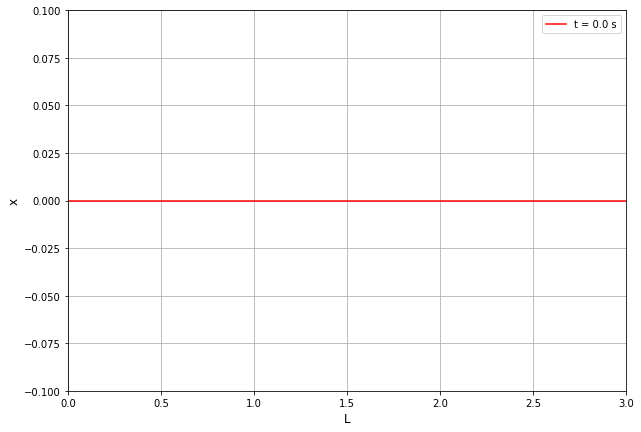

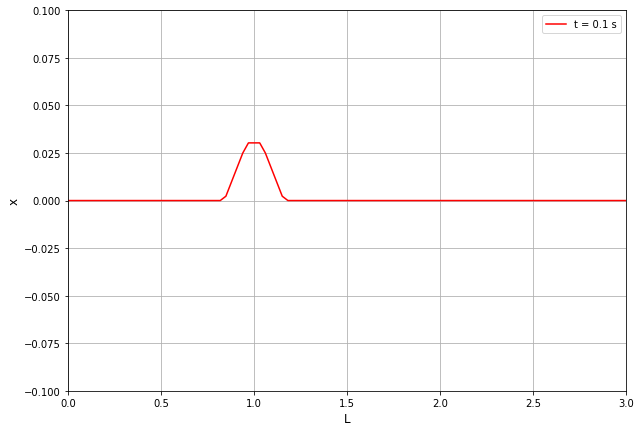

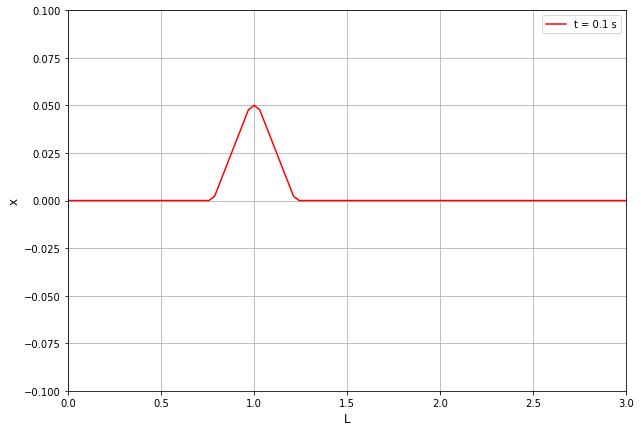

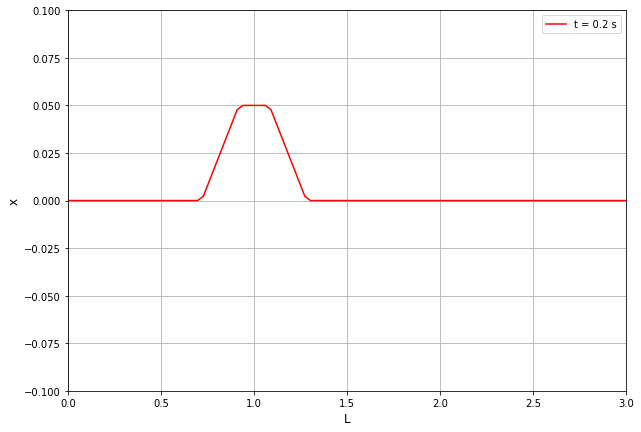

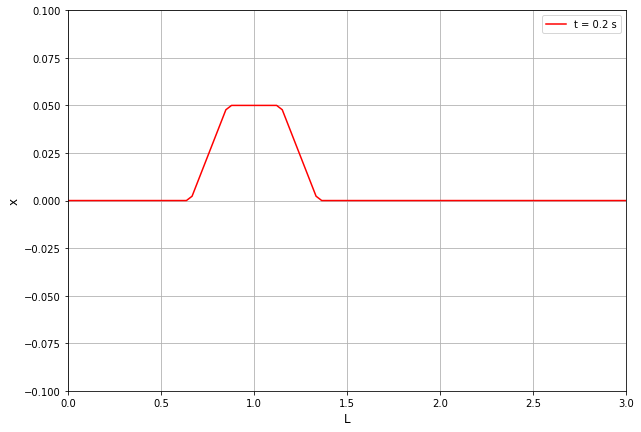

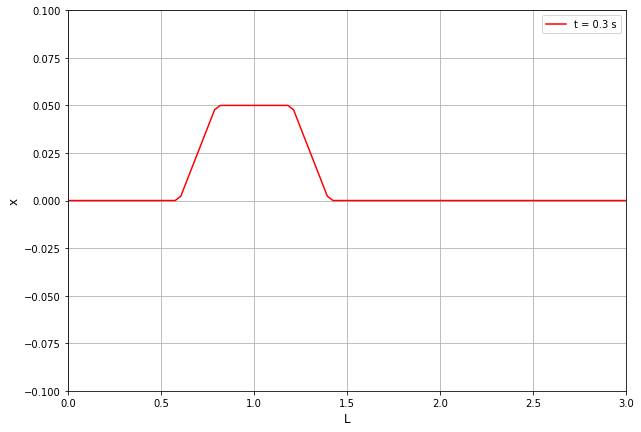

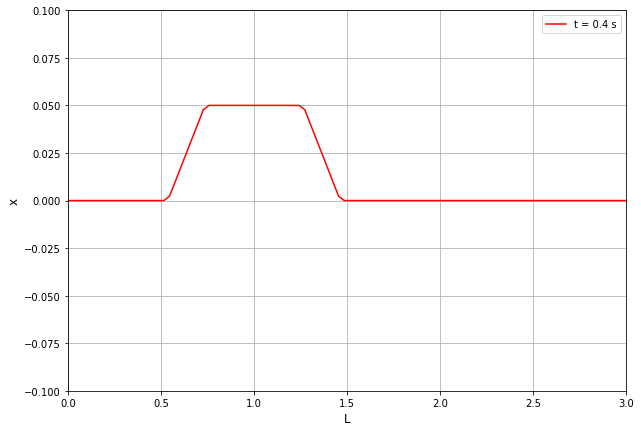

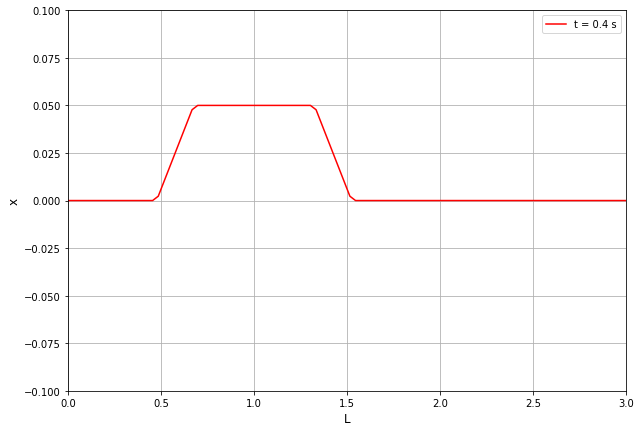

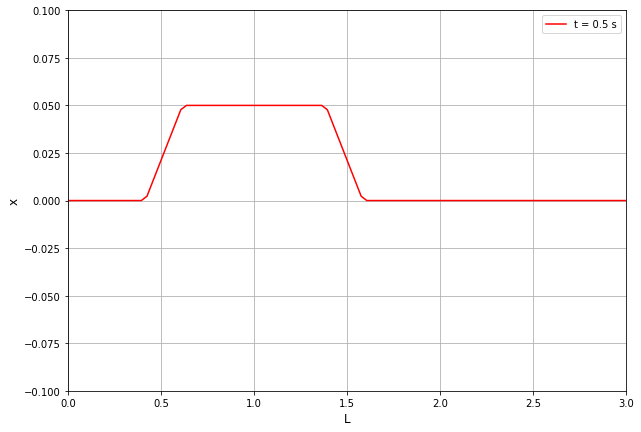

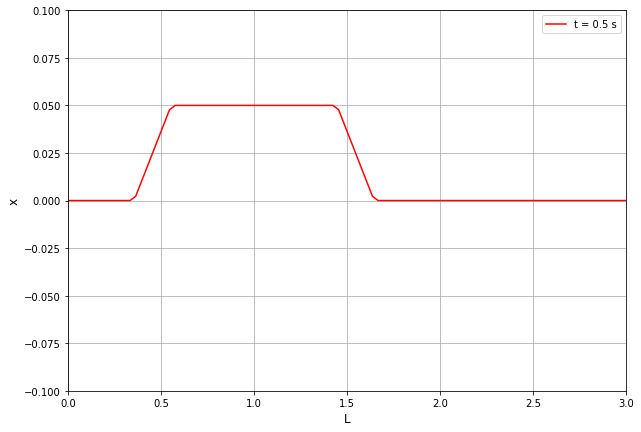

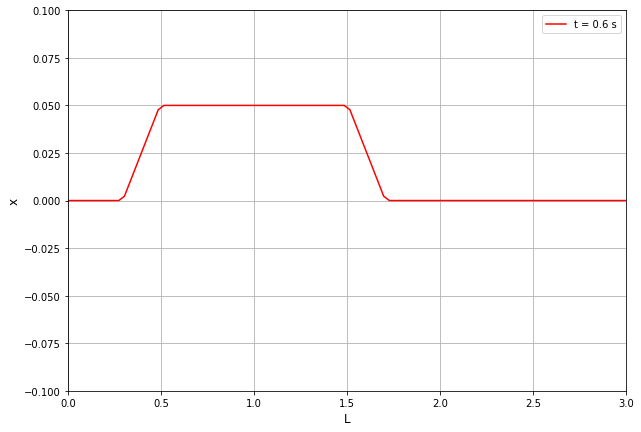

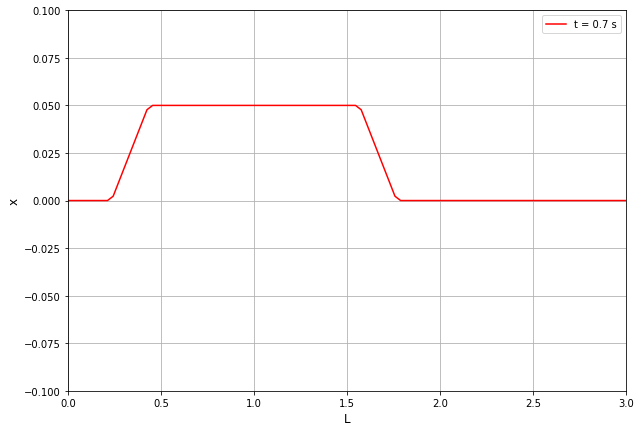

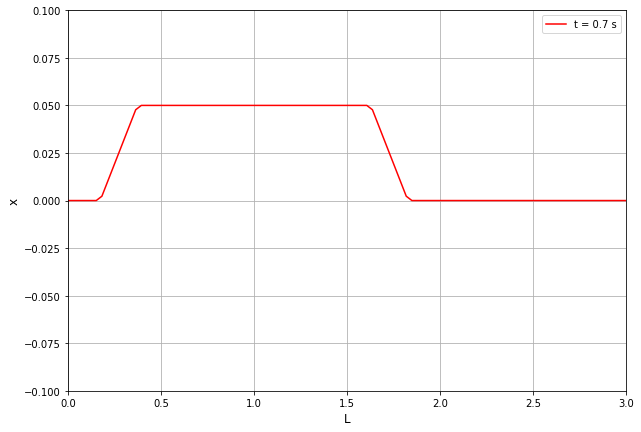

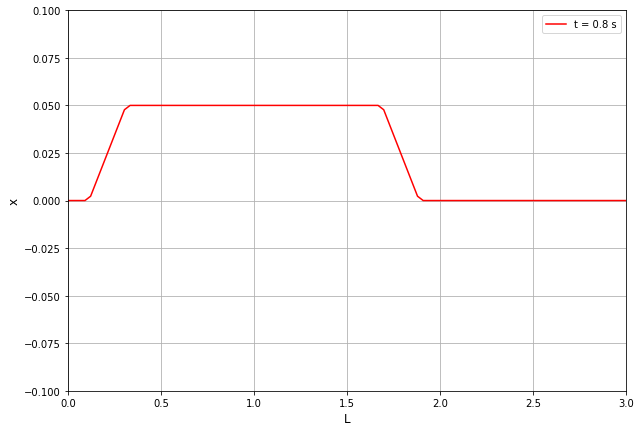

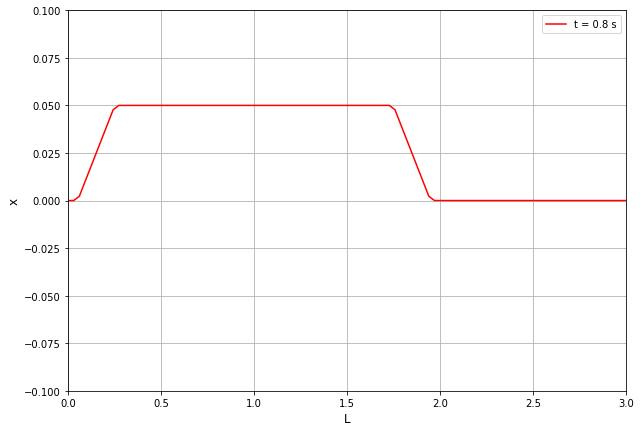

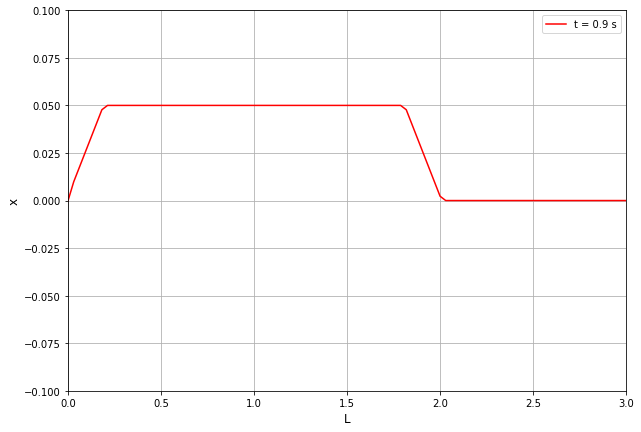

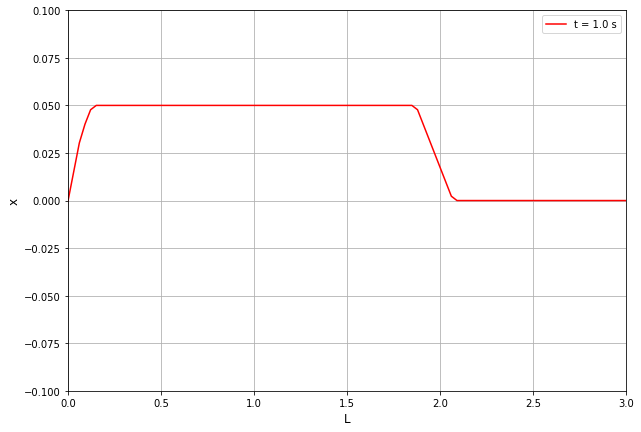

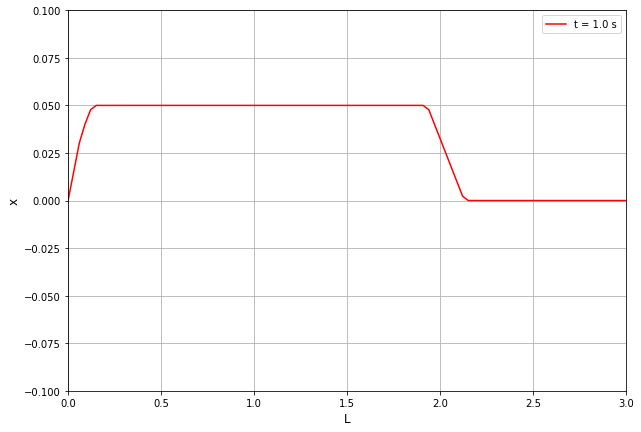

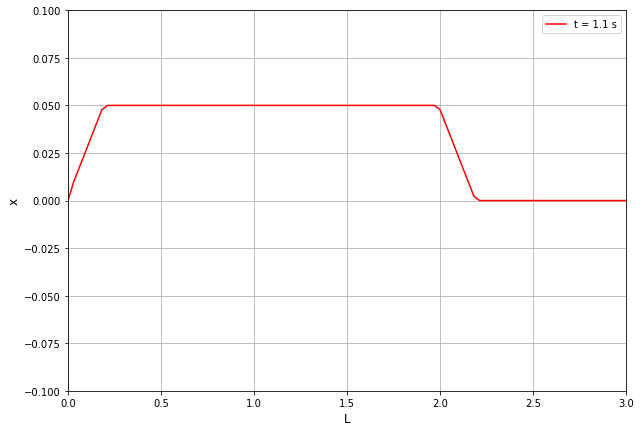

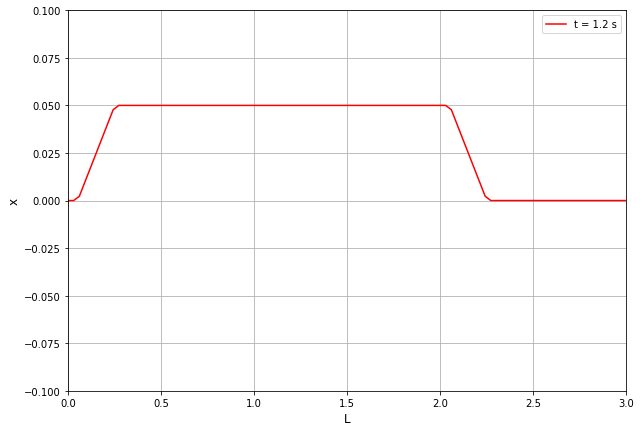

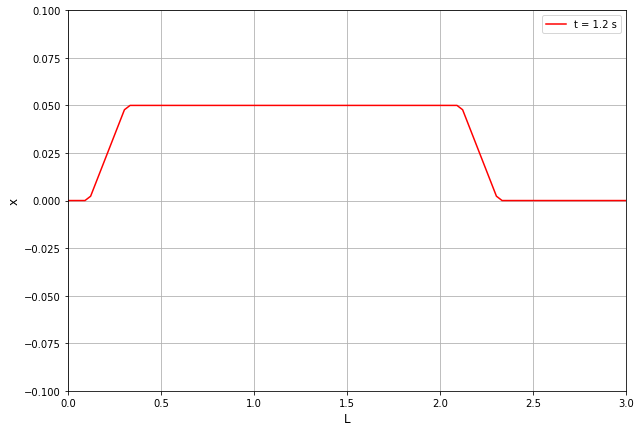

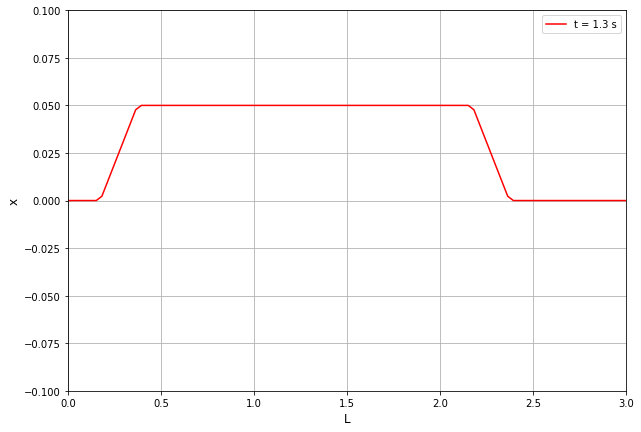

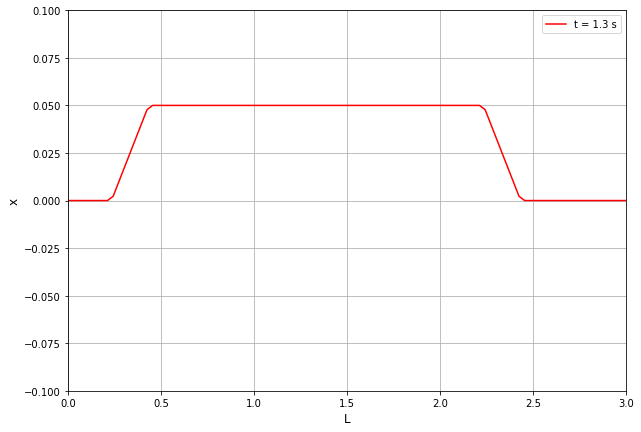

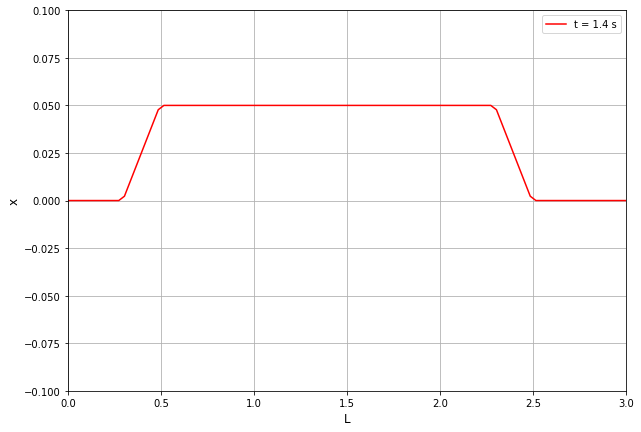

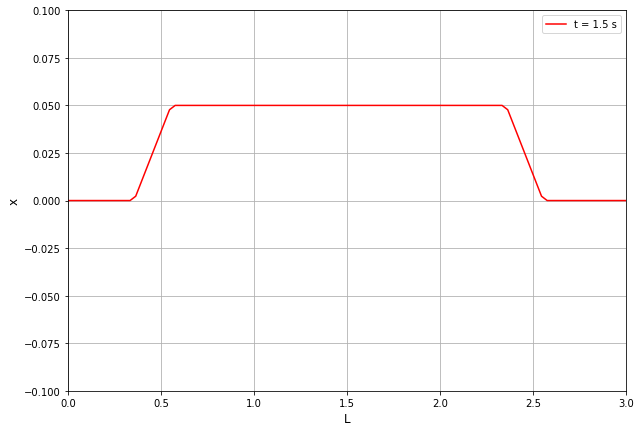

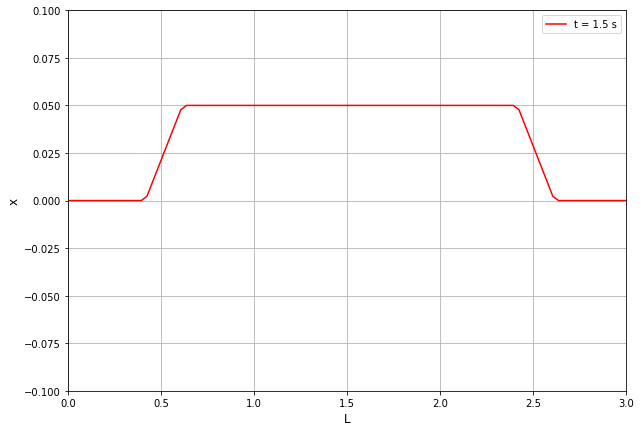

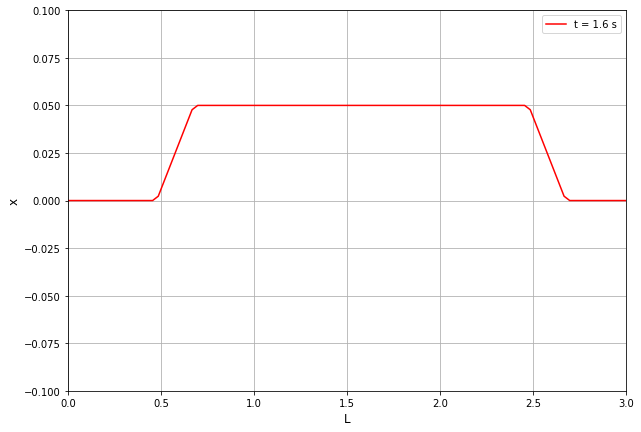

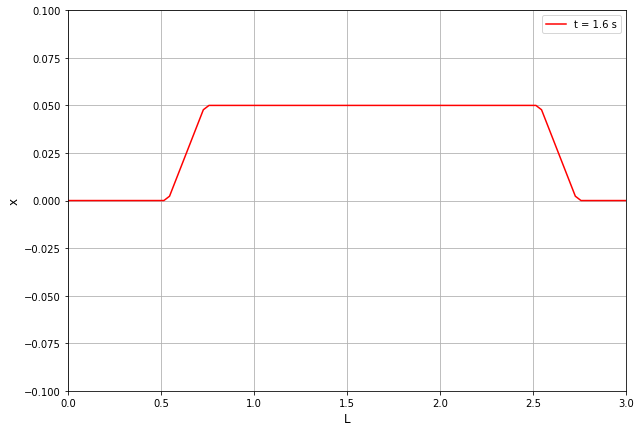

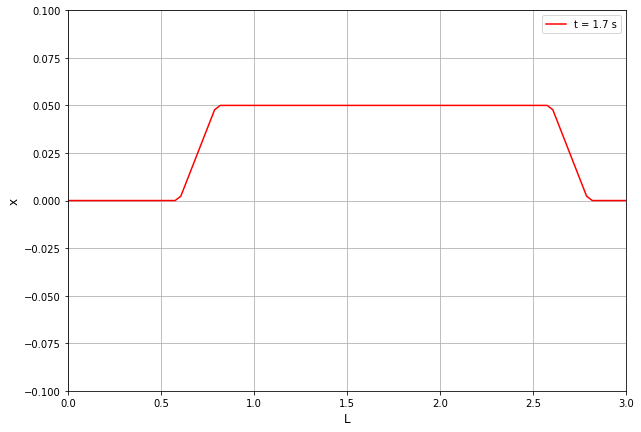

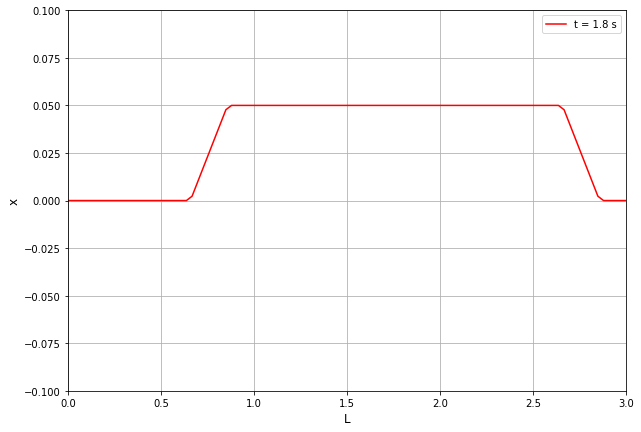

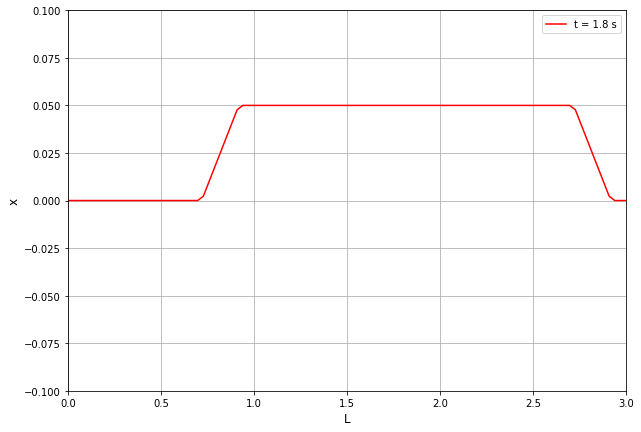

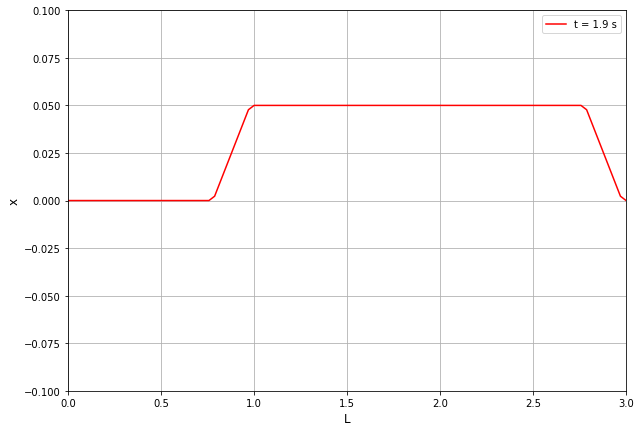

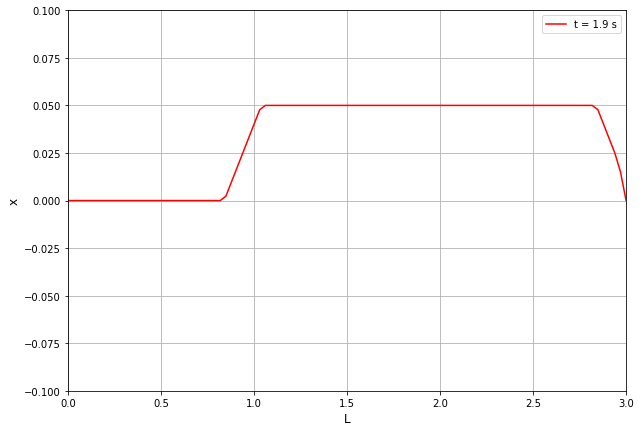

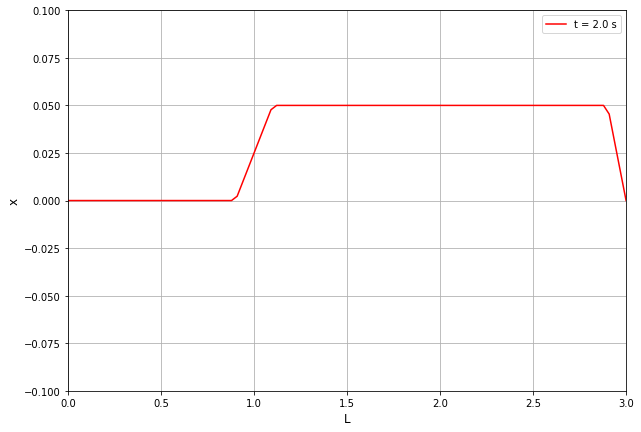

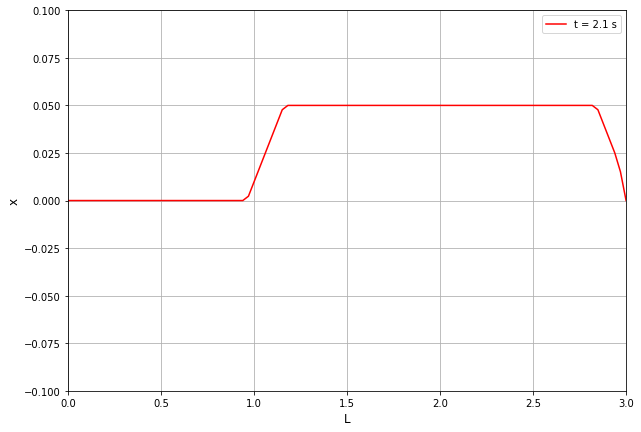

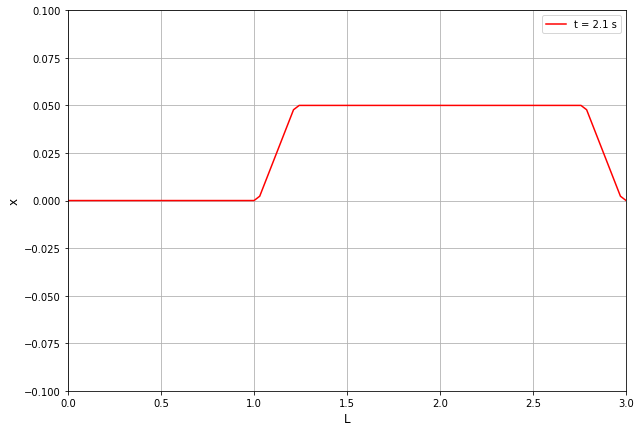

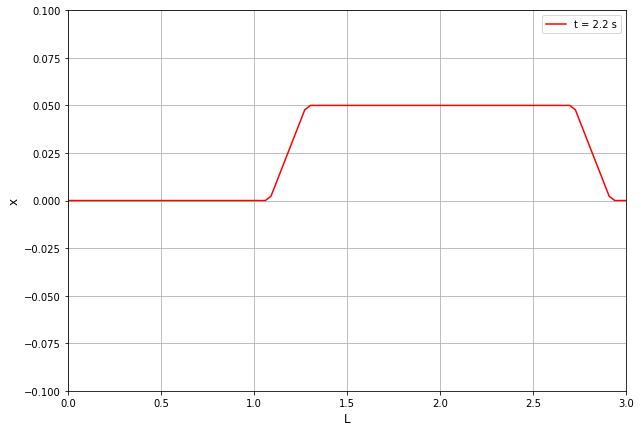

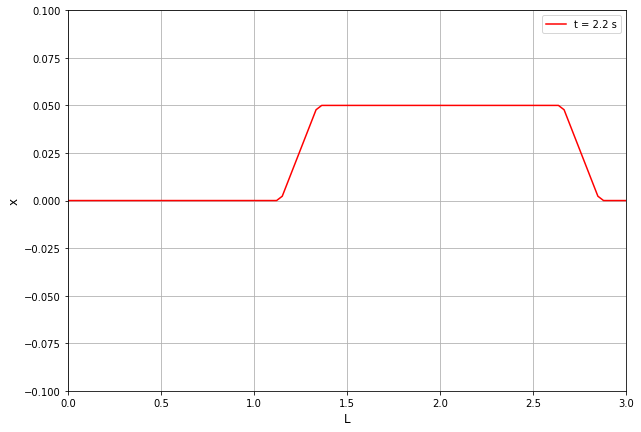

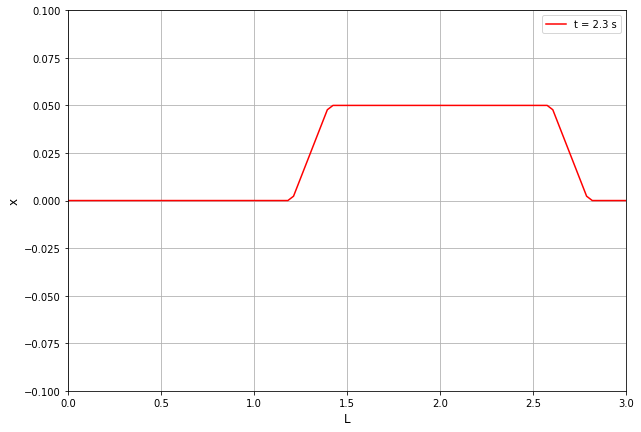

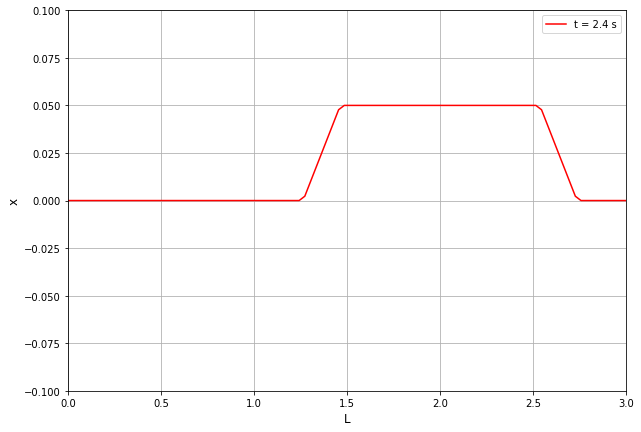

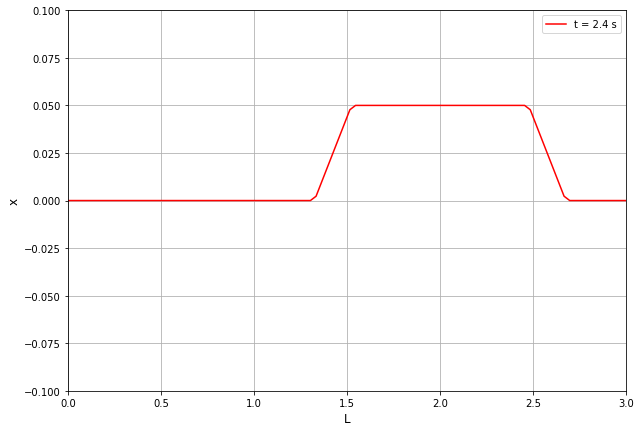

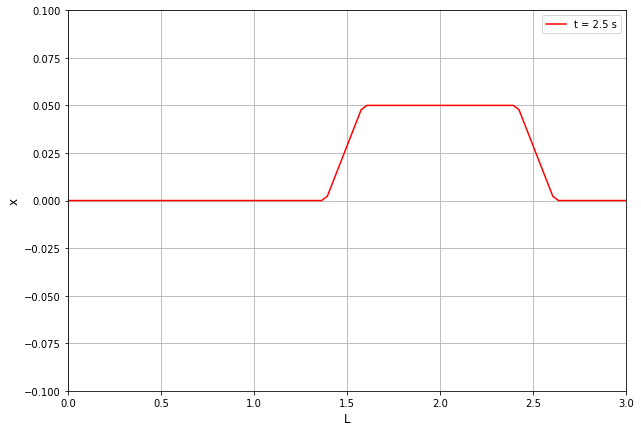

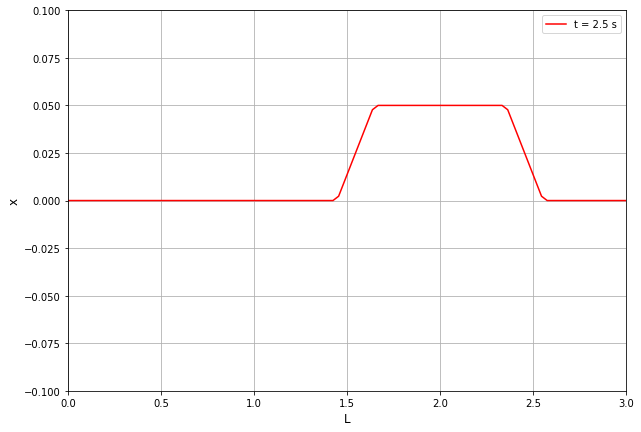

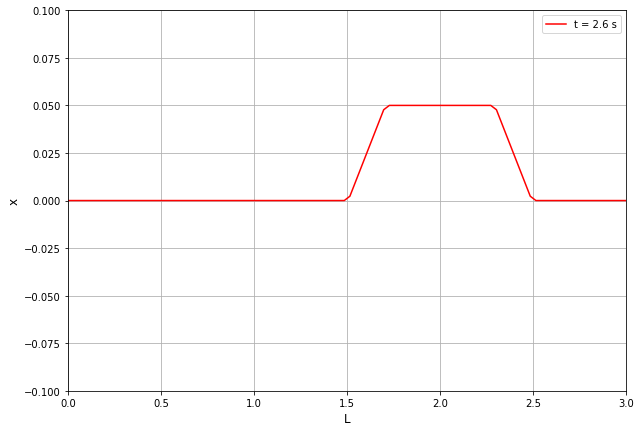

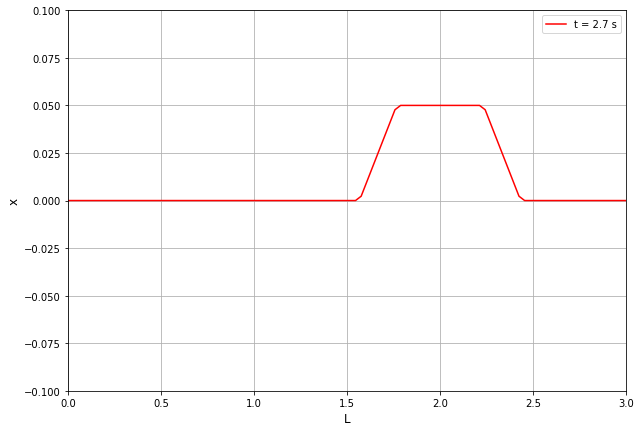

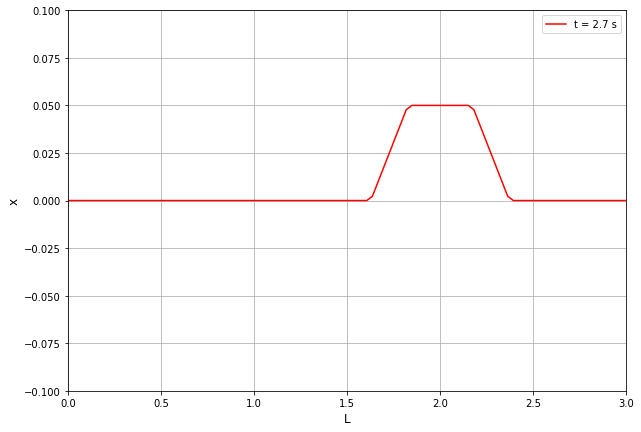

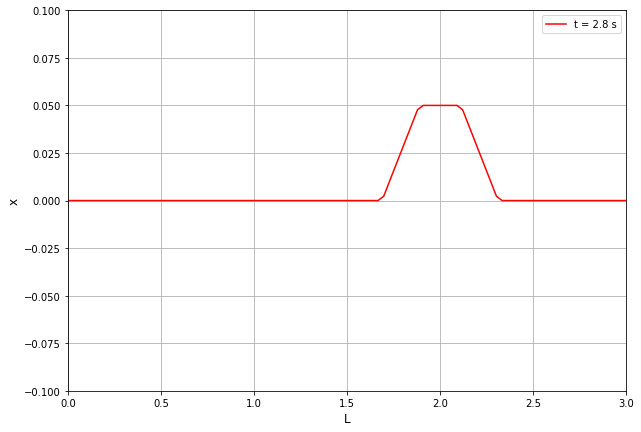

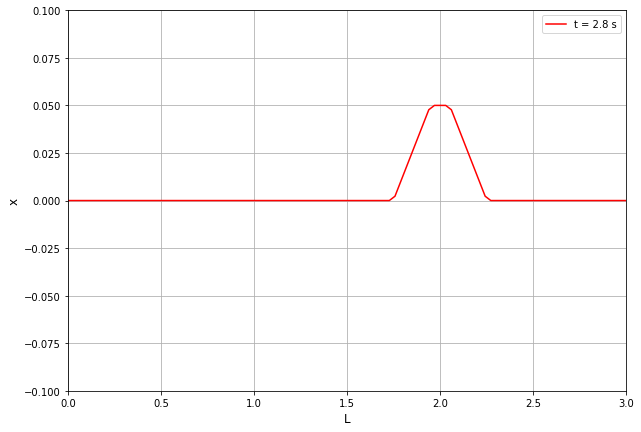

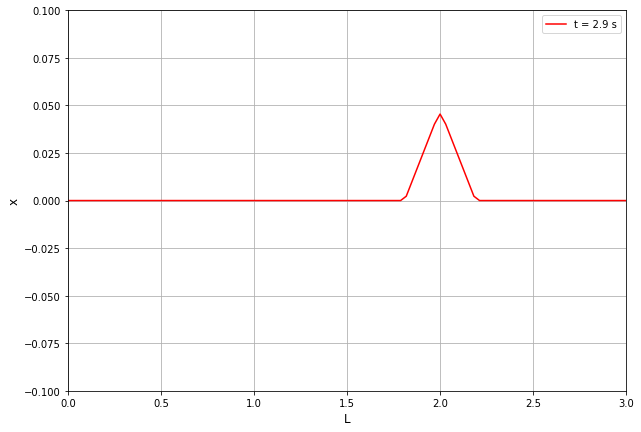

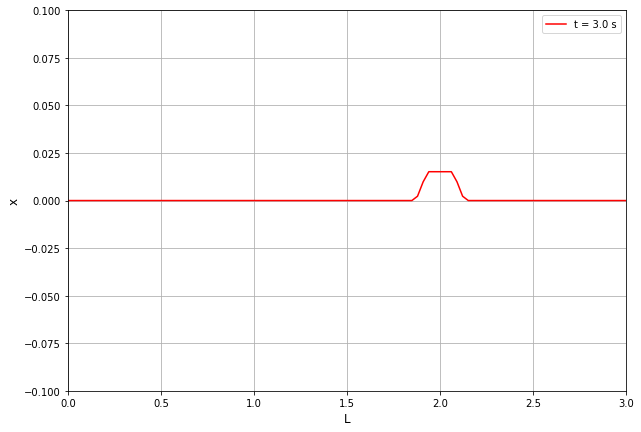

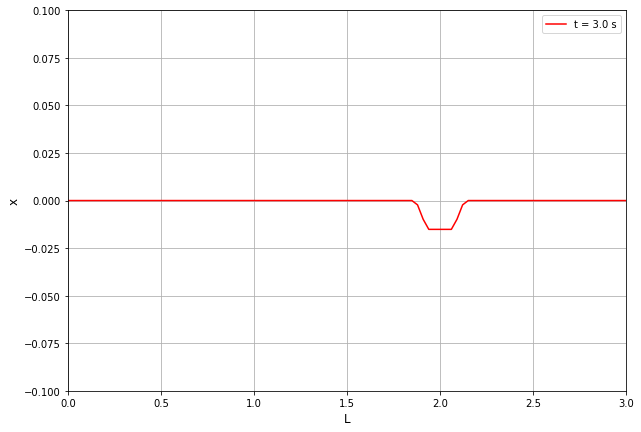

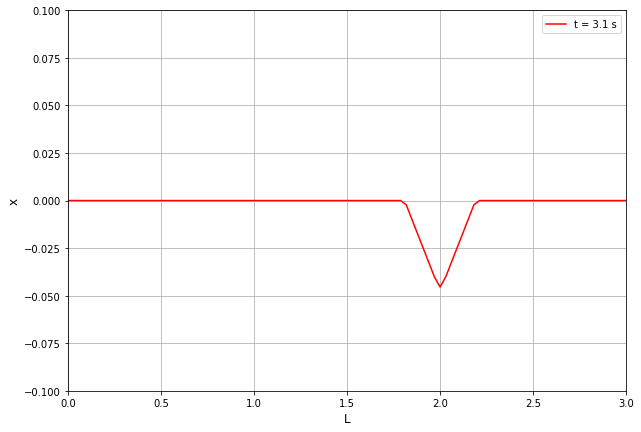

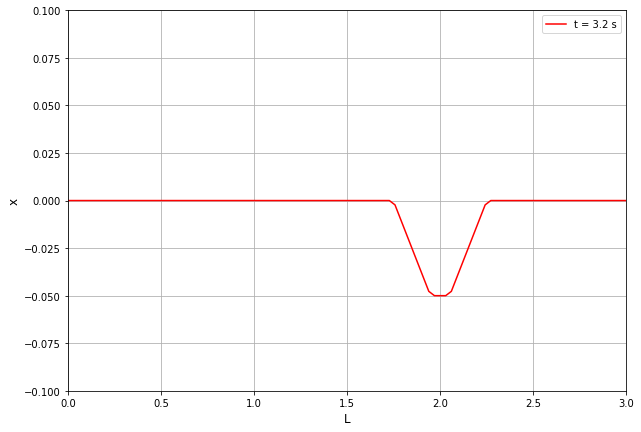

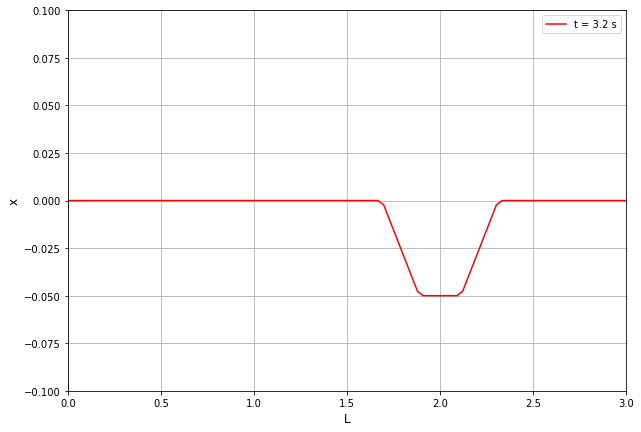

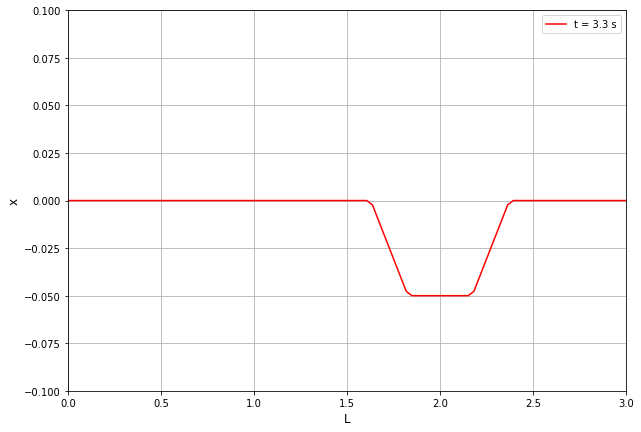

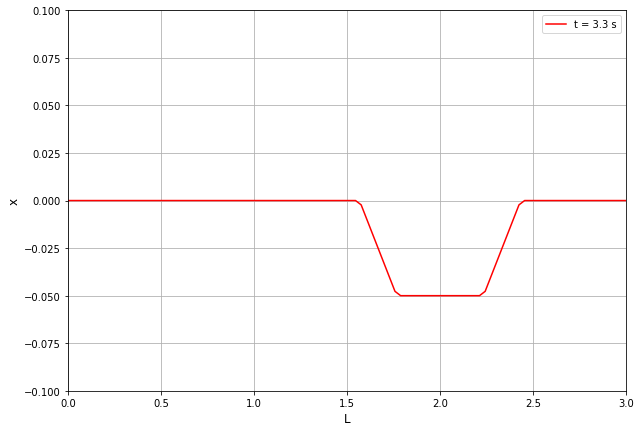

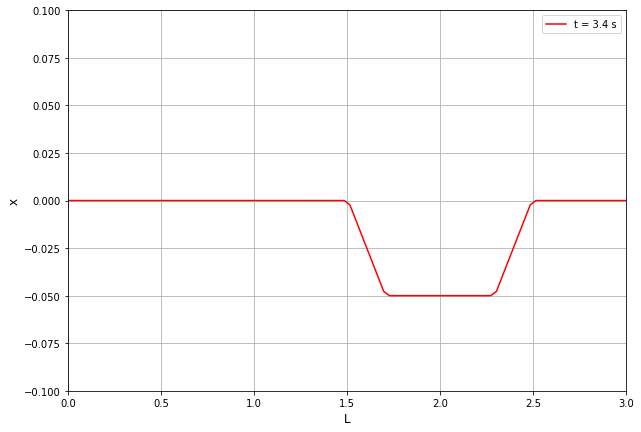

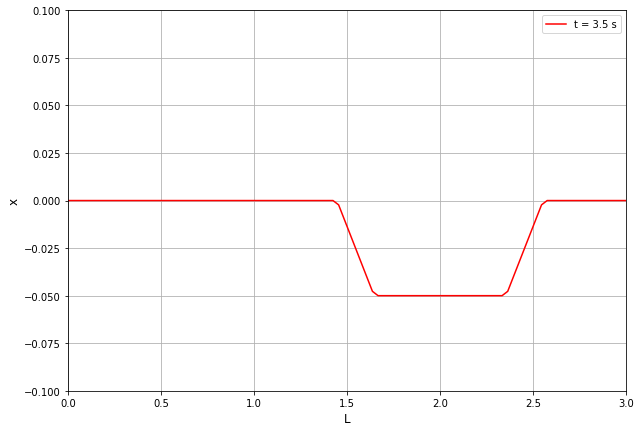

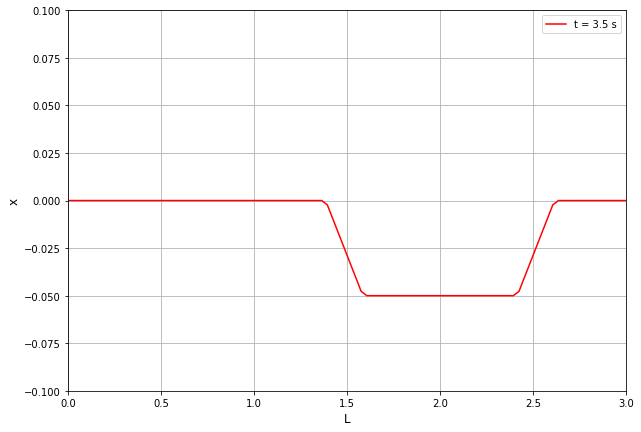

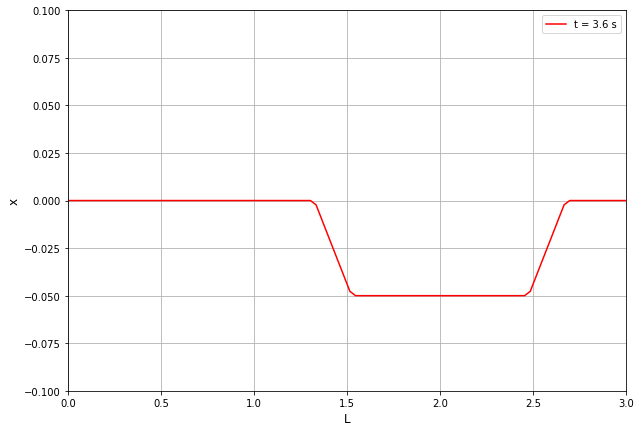

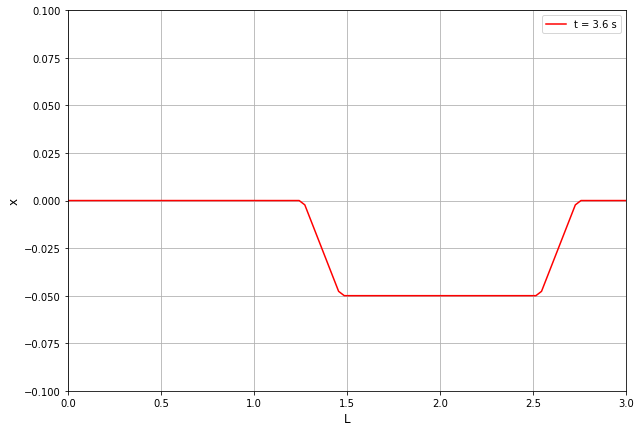

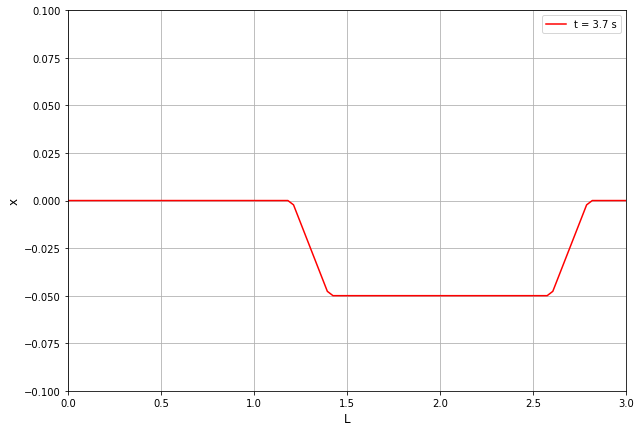

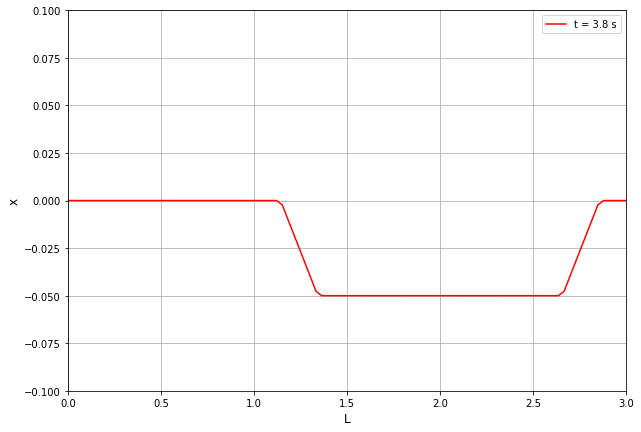

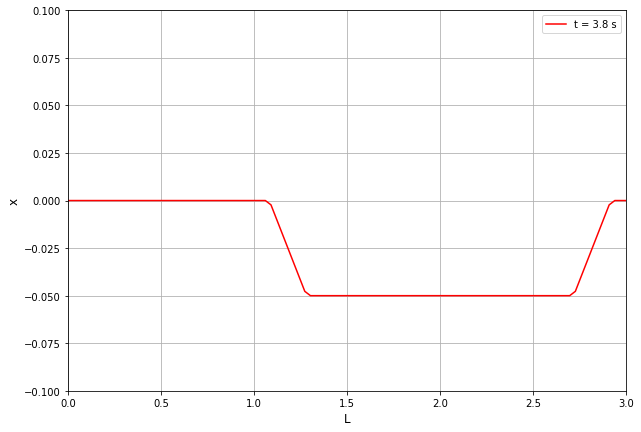

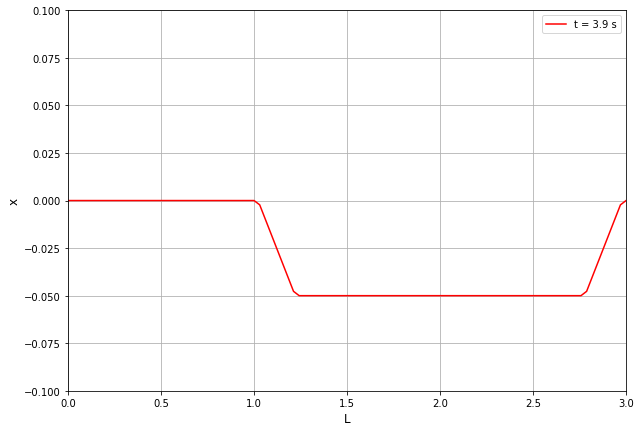

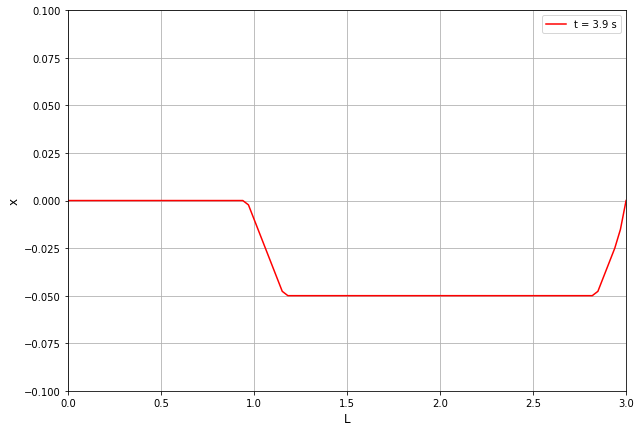

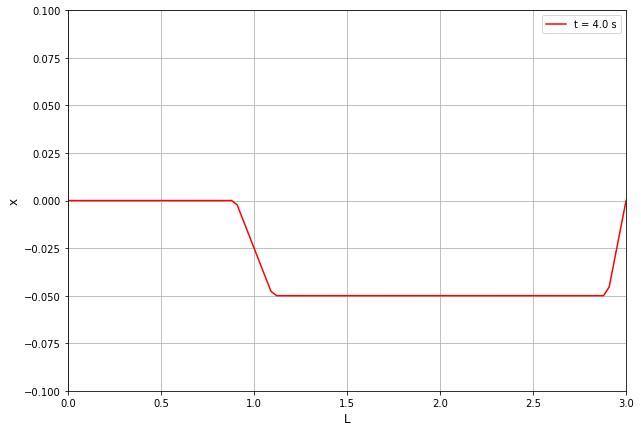

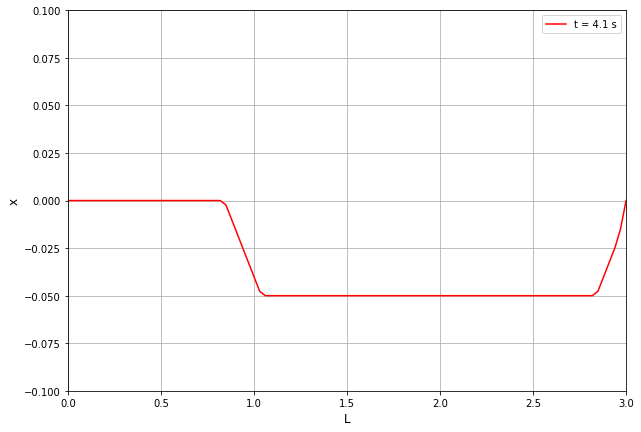

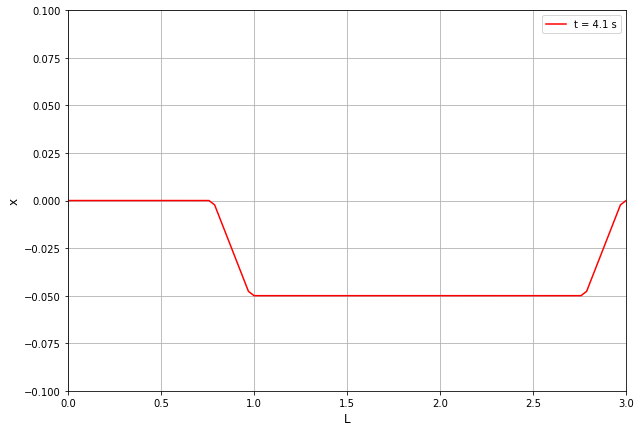

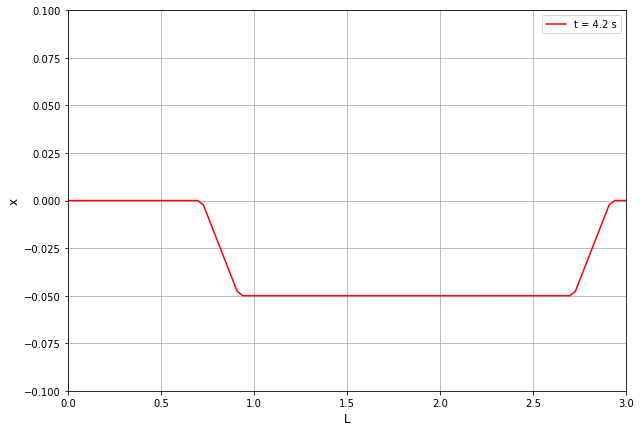

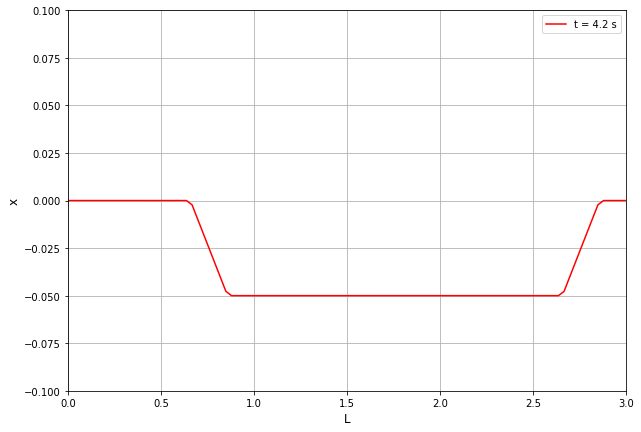

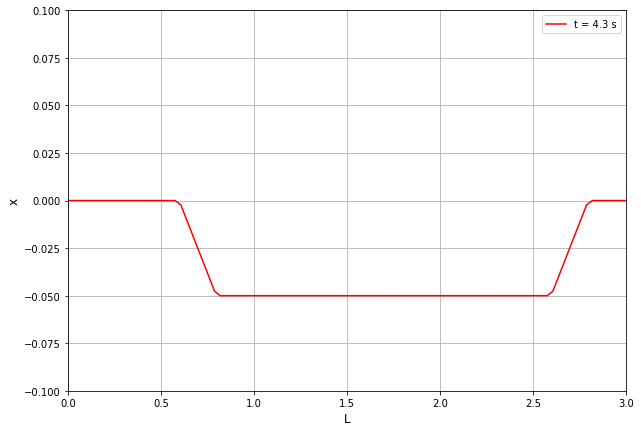

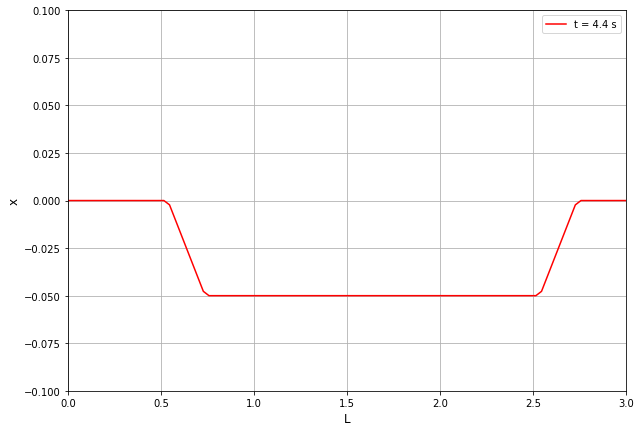

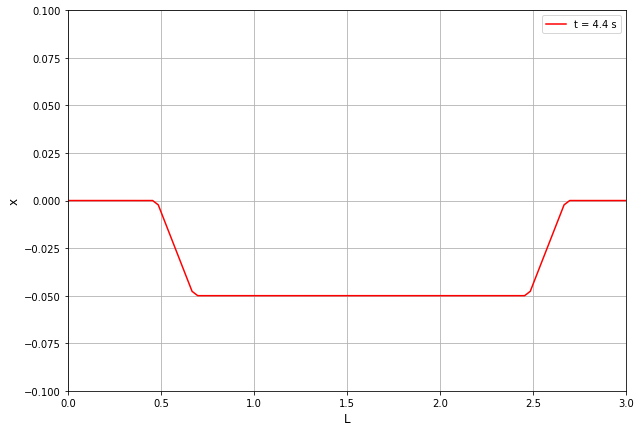

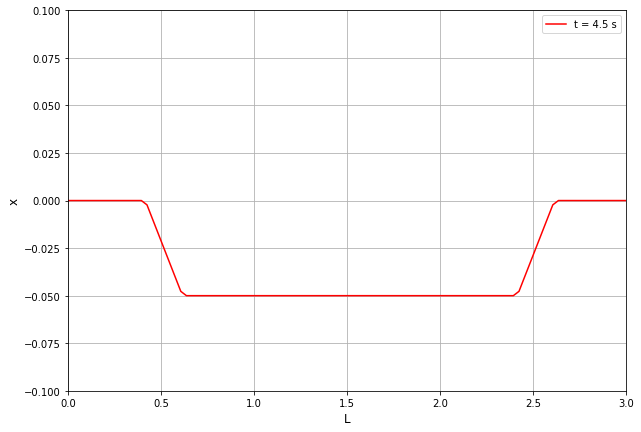

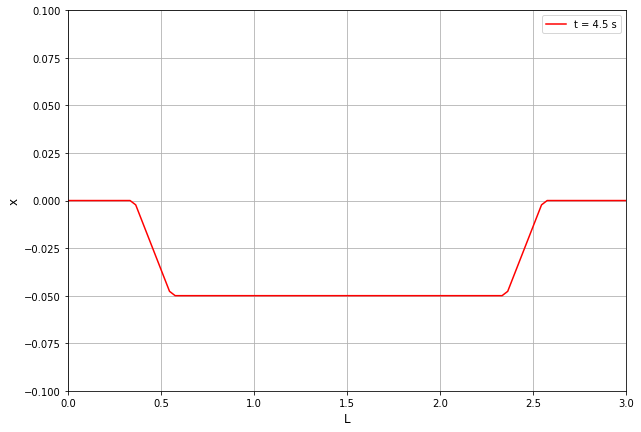

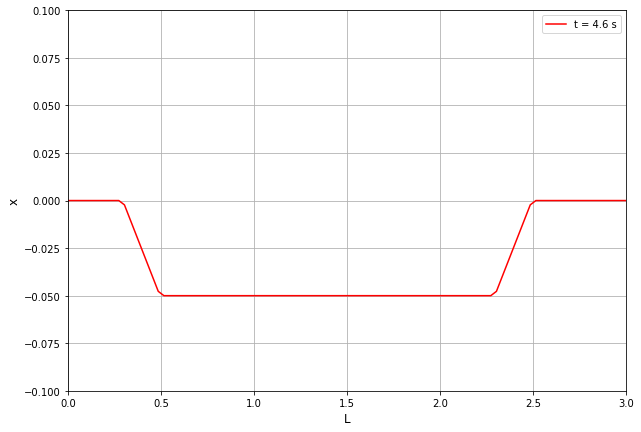

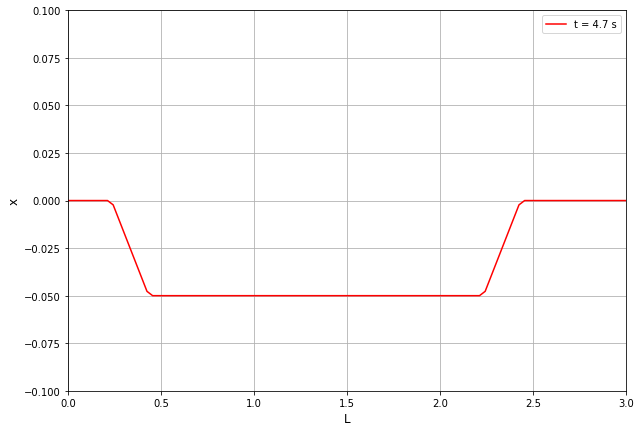

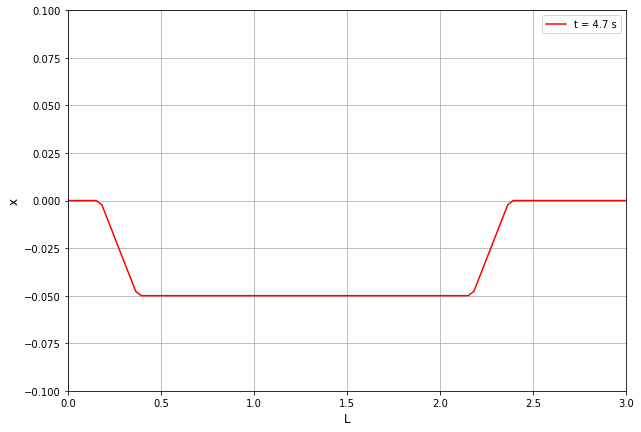

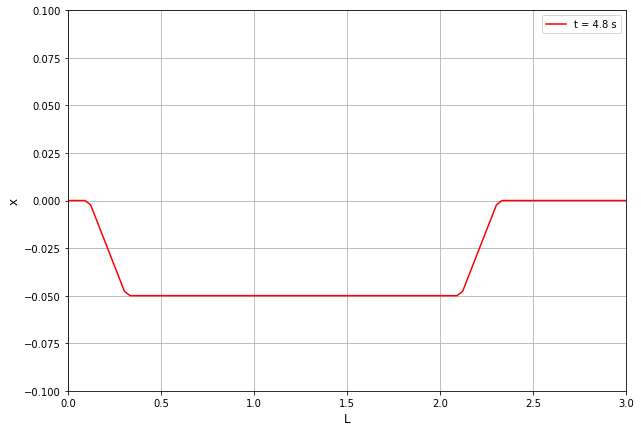

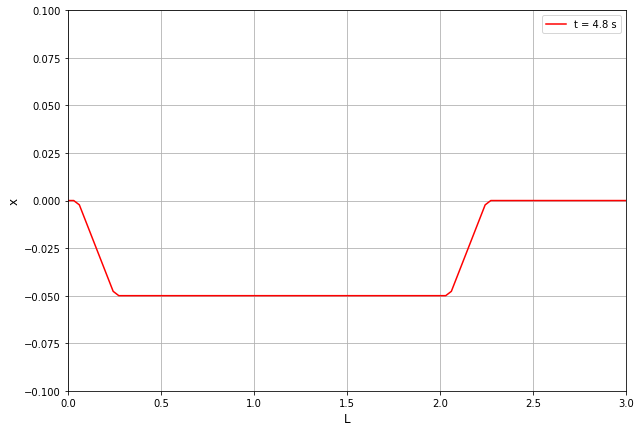

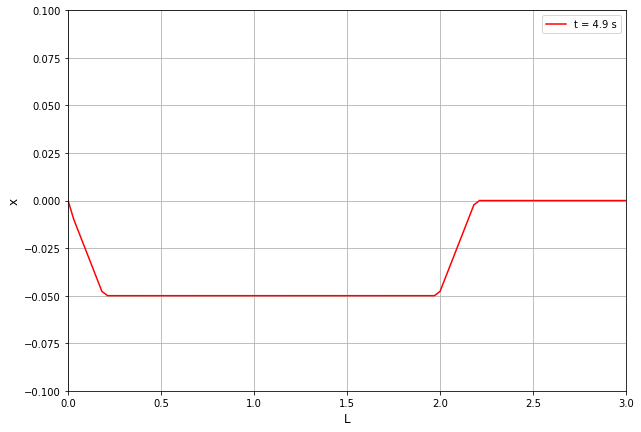

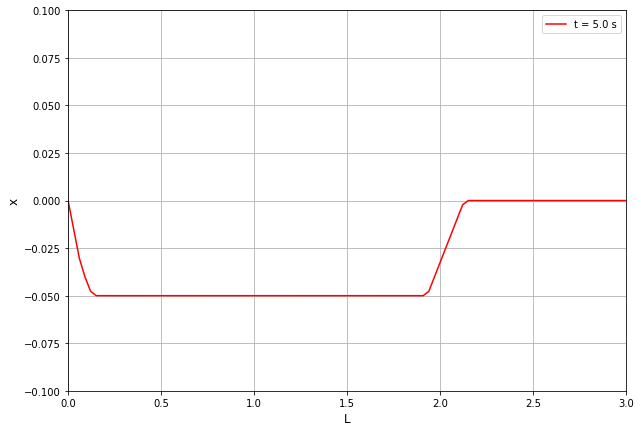

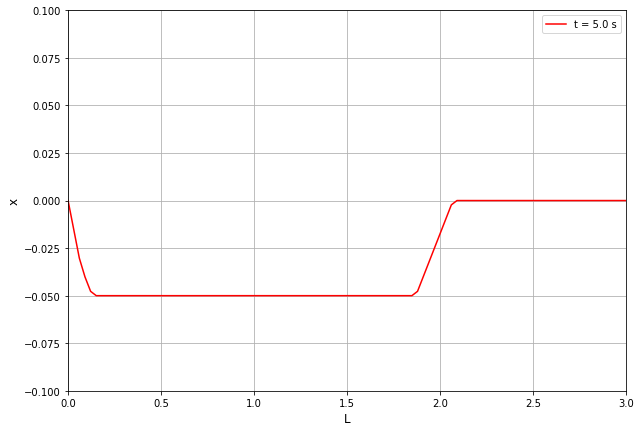

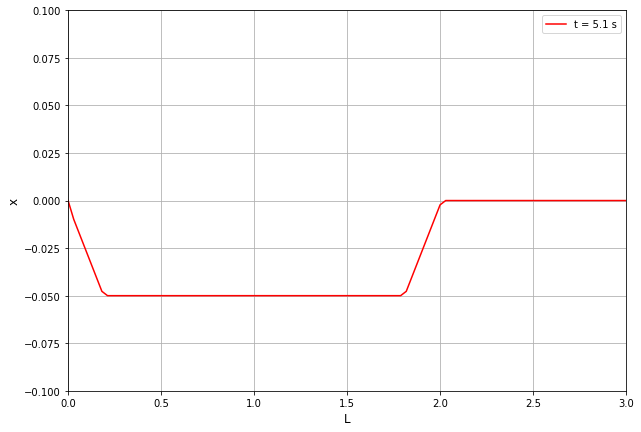

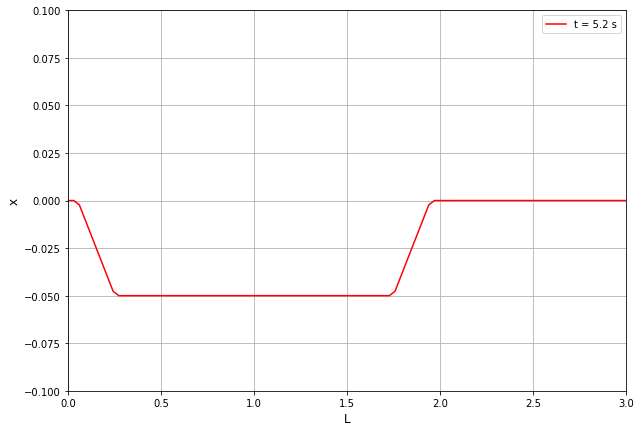

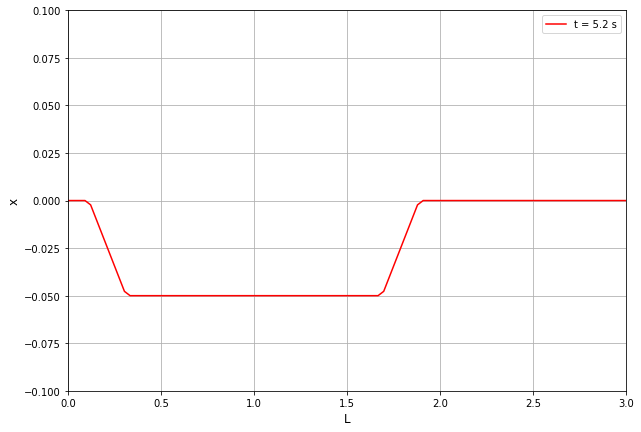

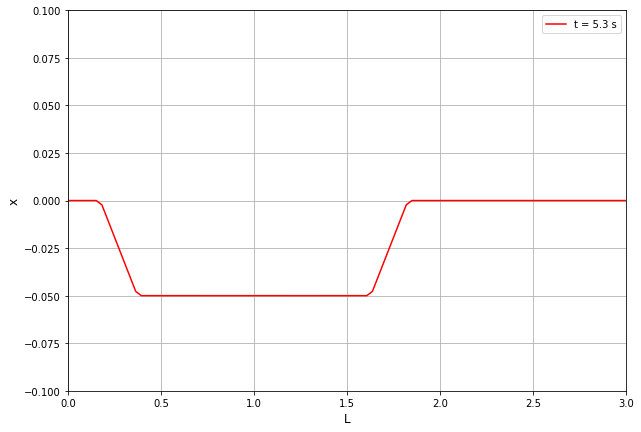

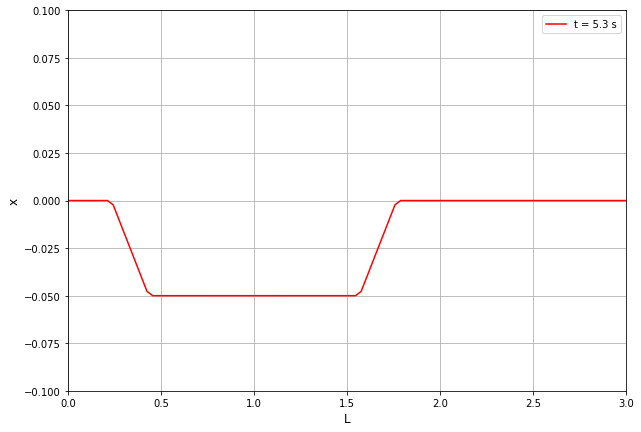

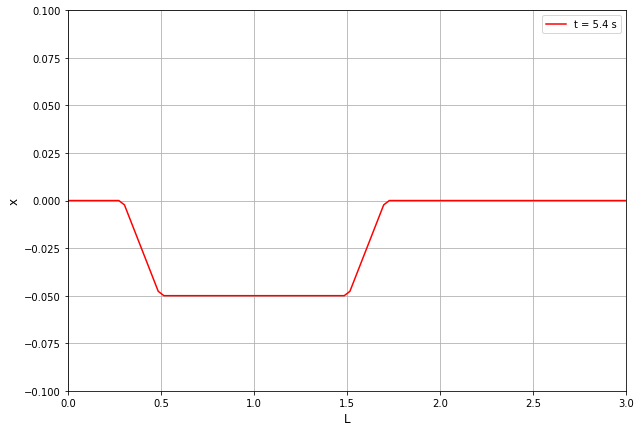

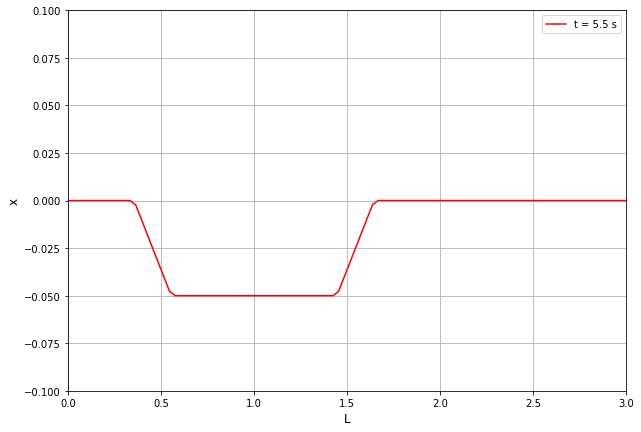

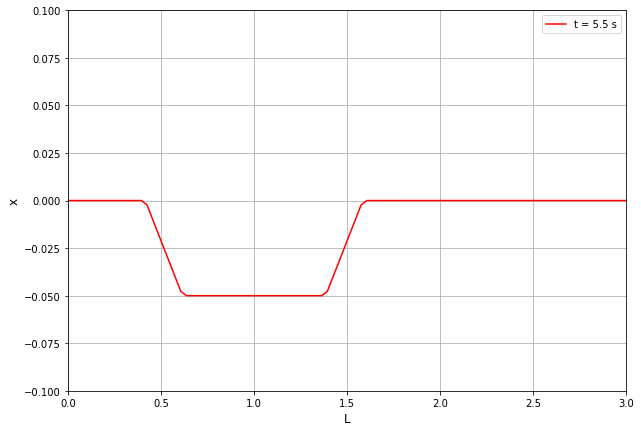

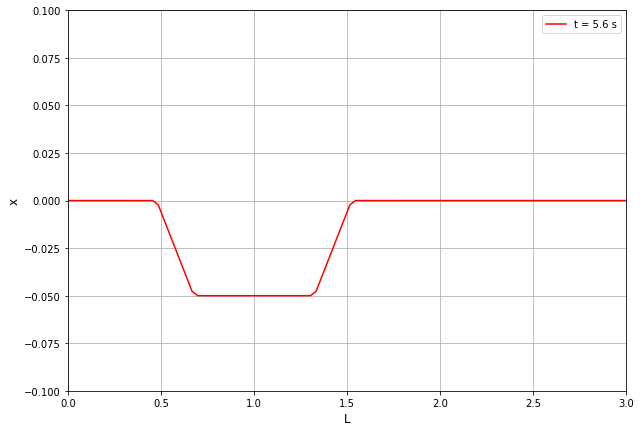

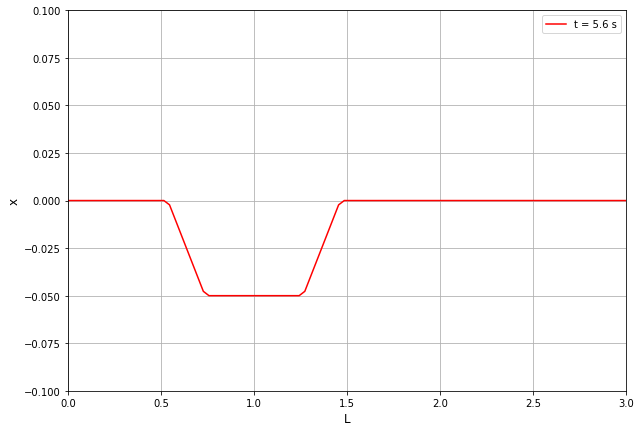

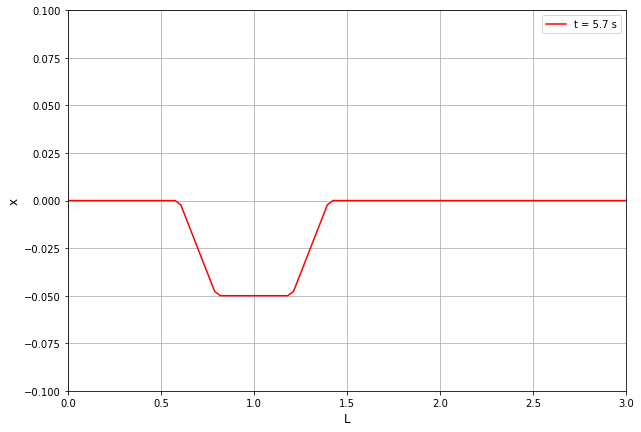

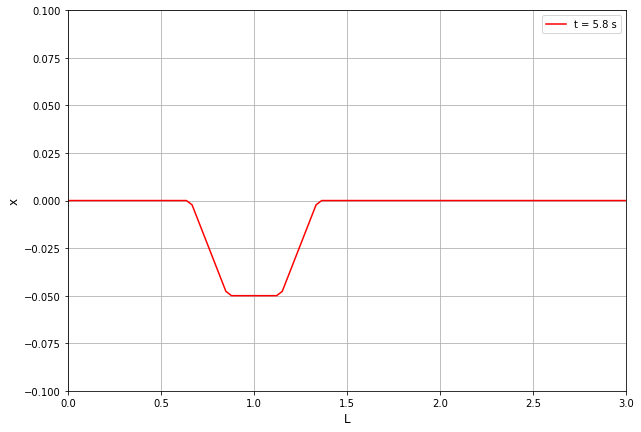

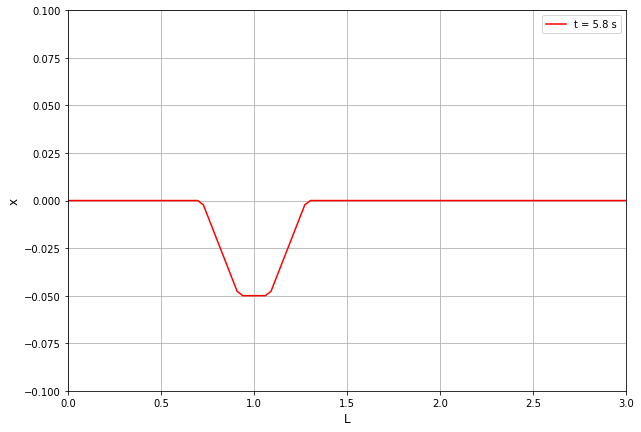

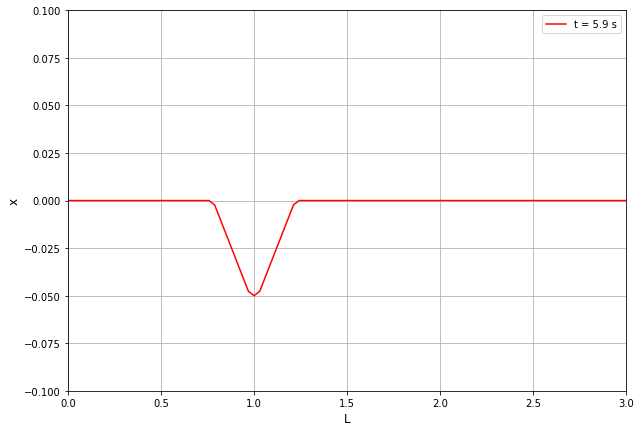

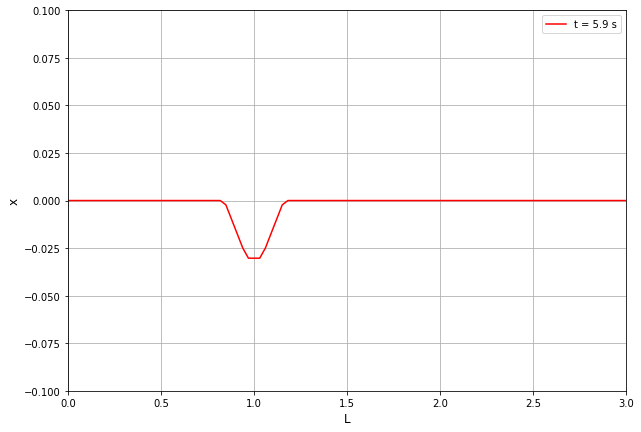

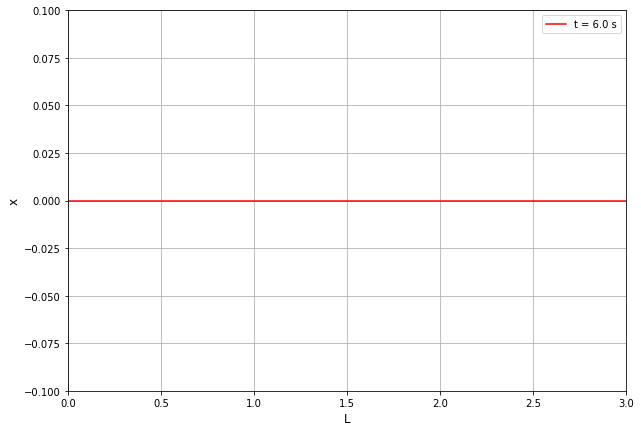

In [ ]:
def cuerda(u, T0, V0, P0,nDeW, nombreDelGif):
  delta = 0.2
  pMax = 1000
  x=np.linspace(0,l,100)
  w1 = (nDeW*np.pi*np.sqrt(T0/u))/l
  periodo = (2*np.pi)/w1
  tiempo = np.linspace(0, periodo, 100)

  i=1
  for t in tiempo:
    #Fourier
    psi=0
    for p in np.arange(1,pMax+1,1):
      A = ((-4*V0*l* np.sqrt(u))/(np.sqrt(T0)*((p*np.pi)**2))) * np.sin((p*np.pi*P0)/l) * np.sin((p*np.pi*delta)/(2*l))
      psi = psi + ( A * np.sin((p*np.pi*x)/l) * np.cos(((t*p*np.pi*np.sqrt(T0))/(np.sqrt(u)*l))+(np.pi/2)))

    fig, ax = plt.subplots(figsize=(10,7));
    ax.set_xlim(0, l)
    ax.set_ylim(-0.1, 0.1) #OJO: valores fijados para eje y, si van a modificar el codigo, tener esto en cuenta


    plt.plot(x,psi, c='r', label = 't = '+str(round(t,1))+' s')
    plt.xlabel('L', fontsize = 12)
    plt.ylabel('x', fontsize = 12)
    plt.grid()
    plt.legend()
    #plt.show()
    plt.savefig(str(i)+'.png')
    i=i+1

  filename = []
  for i in np.arange(1,100+1,1):
    filename.append('/content/'+str(i)+'.png')

  with imageio.get_writer(str(nombreDelGif)+'.gif', mode='I') as writer:
      for fil in filename:
          image = imageio.imread(fil)
          writer.append_data(image)

  # Remove files
  for fil in set(filename):
      os.remove(fil)

u=1
T0=1
V0=0.5
P0=l/3
cuerda(u,T0,V0,P0,1,1)

# (e) Un afinador planea modificar la tensión T0 aplicada sobre una cuerda así como también la posición P0 en la que percute el martillo. En términos de los datos del enunciado y, en caso de ser posible, indicar los valores de T0 y P0 que permiten lograr:

**(i) Que el primer modo oscile a una frecuencia fundamental $\omega_f$, evitando la excitación del
armónico de frecuencia 6 $\omega_f$ y sin cancelar a su vez el armónico 3 $\omega_f$**

Por argumentos de simetría, es fácil ver que si $P_0=\frac{L}{2}$ tendremos un máximo en ese punto y la función será simétrica respecto a la recta vertical $P_0$. Éstas son características que los modos pares no tienen y además dichos modos tienen un nodo en $\frac{L}{2}$ así que no aportarán al movimiento.

 Otra condición que se le puede dar a $P_0$ es que se posicione justo en los nodos característicos del modo 6 para que este no aporte en la serie. Los nodos que hay en este modo son: $\frac{L}{6}$, $\frac{L}{3}$, $\frac{L}{2}$, $\frac{2L}{3}$ , $\frac{5L}{6}$ y los extremos que los obviamos. Pero, como se busca anular el modo 6 manteniendo intacto el 3, debemos evitar ubicar $P_0$ en algún nodo que estos modos tengan en común ($\frac{L}{3}$ y $\frac{2L}{3}$).Así que podemos cumplir con esta condición posicionando a P0 en $\frac{L}{6}$, $\frac{5L}{6}$ y $\frac{L}{2}$. Dato adicional: Si se ubicara $P_0 = \frac{L}{2}$ se estaría anunlando el modo 6 y máximizando el modo 3 (porque se está golpeando un nodo del modo 6 y un antinodo del modo 3). Esto se puede corroborar con los sliders del **item B** y se visualiza muy bien cuando pasando del modo 5 al 6 no cambia nada dentro de la funcion.

 Finalmente, la condición que debe cumplir $T_0$ para que esto se cumpla es que, partiendo de la **Ecuación 1**
 $$Ec. 9$$ $$\mu \cdot \left( \frac{\omega_f *L}{\pi} \right) ^{2}=T_0$$




In [ ]:
#con L=3 los valoes de P0 para corrobar esto en el slider son  0.5 , 2.5 y 1.5
def vo(pMax=10, P0 = l/3, V0 = 0.5, delta = 0.2):

  x=np.linspace(0,l,1000)
  psi = 0
  for p in np.arange(1, pMax+1, 1):
    Fp = ((4*V0/(p*np.pi)) * np.sin((p*np.pi*P0)/l) * np.sin((p*np.pi*delta)/(2*l)))
    psi = psi+ Fp*np.sin((p*np.pi*x)/l)

  plt.figure(figsize=(10,7))
  F(0)
  plt.plot(np.arange(P0-(delta/2),P0+(delta/2),10), V0)
  #fourier
  plt.plot(x,psi, c='b', label = r"$\dot\psi$")
  plt.title ('Aporte del modo %i' %(pMax))
  plt.legend()
  plt.grid()

<Figure size 720x504 with 0 Axes>

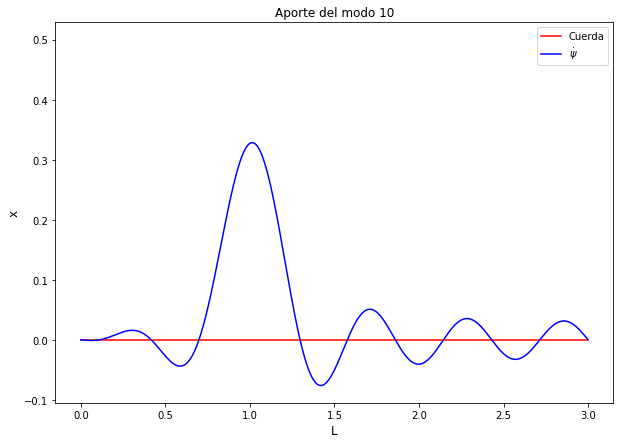

In [ ]:
iwy.interact(vo,pMax=(1,10,1),P0=(l/6,5*l/6,0.1),V0=(0.1,1,0.1),delta=(0.2,l/6,0.1));

**(ii) que el primer modo oscile a una frecuencia fundamental $\omega_f$, evitando la excitación del
armónico de frecuencia 2 $\omega_f$ y sin cancelar a la vez el armónico 6 $\omega_f$.**

Para anular la frecuencia del armónico 2 debemos colocar un máximo en su raíz $\frac{L}{2}$. Lo inconveniente de éste método es que al otorgarle a $P_0=\frac{L}{2}$ se estará anulando todos los modos pares ya que todos comparten esa raíz. Por lo tanto, corroboramos que esta condición no es posible de cumplir sin importar los valores de $T_0$ y $P_0$.


**(iii) que el primer modo oscile a una frecuencia fundamental $\omega_f$, maximizando a la vez la
excitación del armónico de frecuencia 3 $\omega_f$.**




Para maximizar la frecuencia del modo 3, se golpea en uno de sus antinodos, escogemos $P_0 = \frac{L}{6}$ pero podrian ser tanto $\frac{L}{2}$ como $\frac{5L}{2}$ sin importar si es maximo o minimo. A su vez, necesitamos ajustar $T_0$ tal que $\omega_f=\omega^{(1)}$, por lo que $T_0$ debe ser igual a la **Ecuación 9**